In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

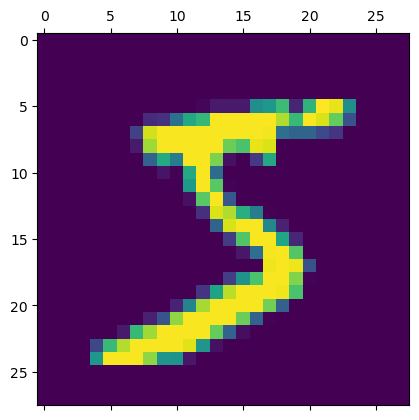

In [8]:
 plt.matshow(X_train[0])

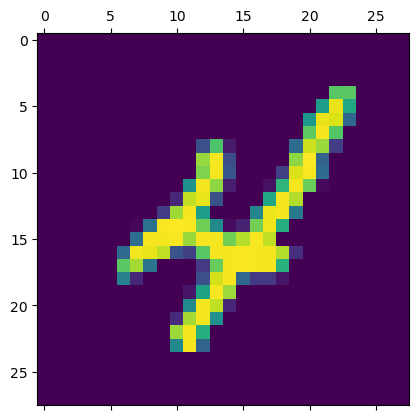

In [9]:
 plt.matshow(X_train[9])

In [28]:
X_train=X_train/255
X_test=X_test/255

In [29]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [30]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
#without using hidden alyer .. therse is just input layer and output layer where there 10 neuron in the output layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",  # adaptive moment estimation
    loss="sparse_categorical_crossentropy",  # output class is categorical (0,9); sparse output variable is integer
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4716 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2659 - accuracy: 0.9265


In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.9253


[0.26831555366516113, 0.9253000020980835]

In [35]:
y_pred=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred[0]

array([2.4119819e-02, 3.1742192e-07, 5.7344168e-02, 9.4654554e-01,
       3.0281548e-03, 7.5357653e-02, 1.2837015e-06, 9.9960220e-01,
       1.0067944e-01, 5.7531309e-01], dtype=float32)

In [37]:
np.argmax(y_pred[0])

7

In [39]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [40]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    3,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    8,  935,   16,    9,    2,   11,    9,   36,    2],
       [   5,    0,   22,  916,    1,   23,    2,   10,   25,    6],
       [   1,    1,    7,    1,  922,    0,   10,    3,   10,   27],
       [  10,    3,    5,   35,   12,  761,   16,    7,   37,    6],
       [   9,    3,    8,    1,    7,   10,  915,    2,    3,    0],
       [   1,    8,   27,    5,   10,    0,    0,  941,    2,   34],
       [   8,   11,    5,   19,    9,   18,    9,    9,  879,    7],
       [  10,    7,    2,   11,   39,    5,    0,   20,    9,  906]])>

Text(95.72222222222221, 0.5, 'Truth')

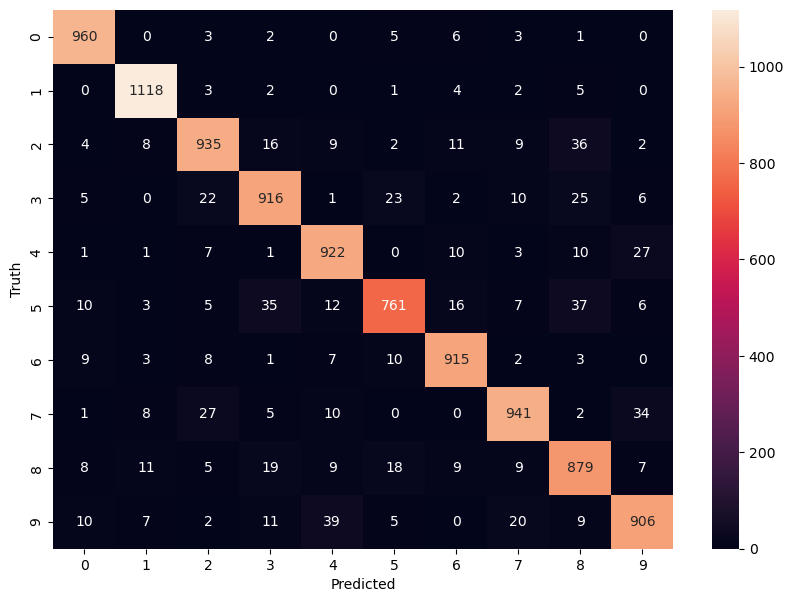

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
#Hidden layer (better performance)
model = keras.Sequential([
    #input layer any number of neurons should be less than the input neuron
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",  # adaptive moment estimation
    loss="sparse_categorical_crossentropy",  # output class is categorical (0,9); sparse output variable is integer
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2402 - accuracy: 0.9288
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1007 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0563 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0438 - accuracy: 0.9858


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9778


[0.07880523800849915, 0.9778000116348267]

Text(95.72222222222221, 0.5, 'Truth')

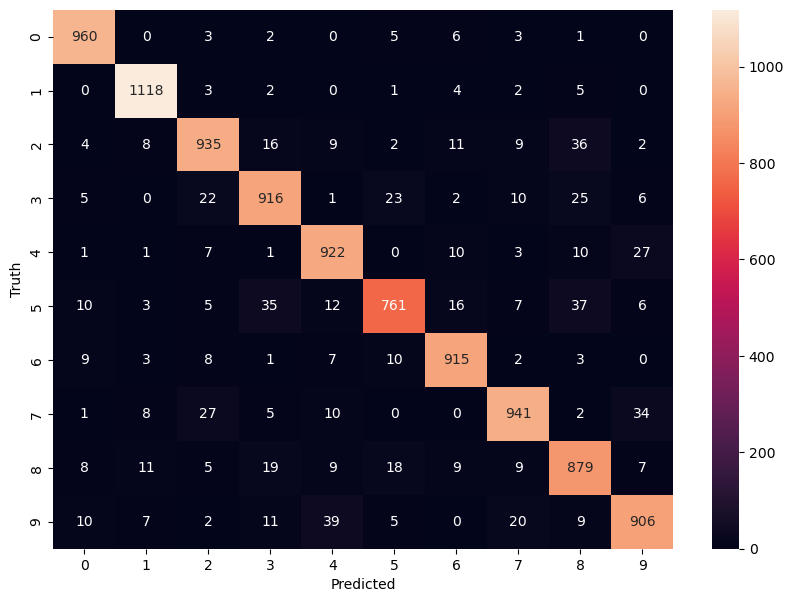

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
#Hidden layer (better performance)
model = keras.Sequential([
    #input layer any number of neurons should be less than the input neuron
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",  # adaptive moment estimation
    loss="sparse_categorical_crossentropy",  # output class is categorical (0,9); sparse output variable is integer
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2469 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1071 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0770 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9853


Text(95.72222222222221, 0.5, 'Truth')

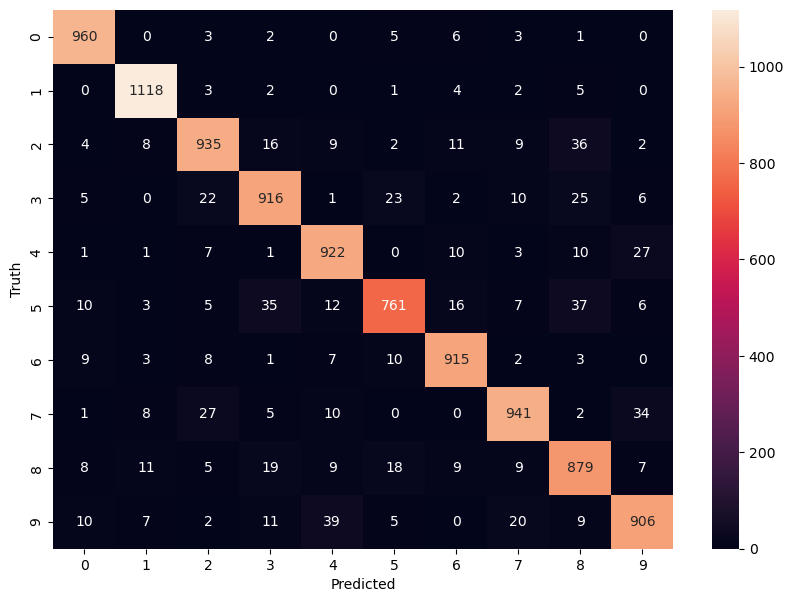

In [50]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

1

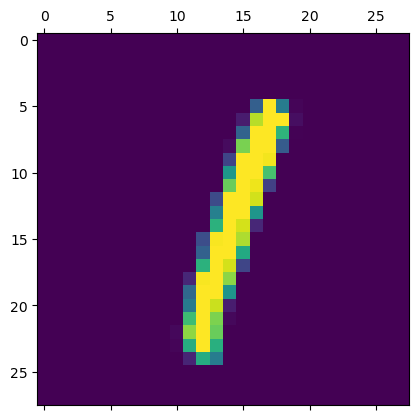

In [54]:
plt.matshow(X_test[5])
np.argmax(y_pred[5])